# Graficar en R

Estas son las principales funciones para graficar utilizando la base de R. Puedes buscar ayuda de cada una con su nombre, y además en explorar argumentos extras con ?par

- `plot`: generic x-y plotting
- `barplot`: bar plots
- `boxplot`: box-and-whisker plot
- `hist`: histograms
- `pie`: pie charts
- `dotchart`: cleveland dot plots
- `image`, `heatmap`, `contour`, `persp`: functions to generate image-like plots
- `qqnorm`, `qqline`, `qqplot`: distribution comparison plots

## Gráficas en x,y

In [8]:
options(repr.plot.width=5 , repr.plot.height=4)

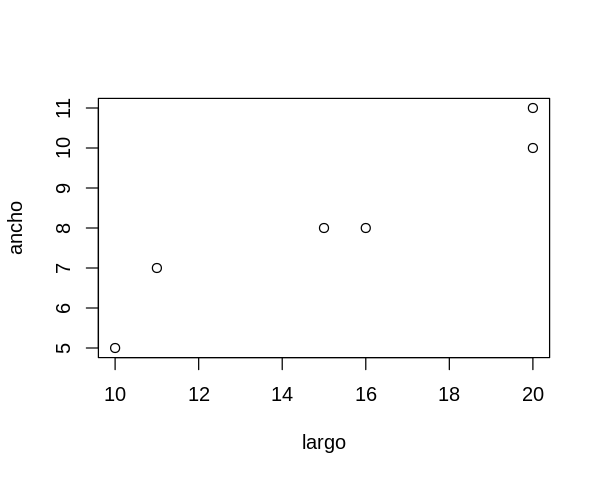

In [9]:
largo<-c(10,20,11,15,16,20)
ancho<-c(5,10,7,8,8,11)
plot(x=largo, y=ancho)

In [10]:
head(cars)

speed,dist
<dbl>,<dbl>
4,2
4,10
7,4
7,22
8,16
9,10


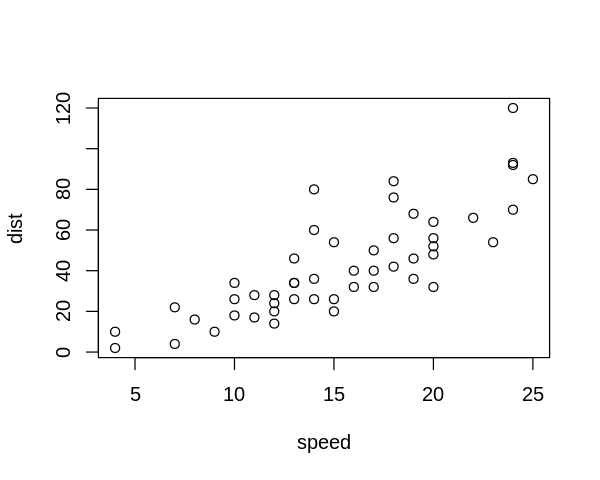

In [11]:
#si tenemos un objeto con dos columnas, se toman como automático x y y
plot(cars)

In [19]:
#cambiar textos y figuras
# graficar vel vs distancia
plot(x=cars$speed, y=cars$dist, xlab="Velocidad", ylab="Distancia", cex=0.5, pch=19)

ERROR: Error in parse(text = x, srcfile = src): <text>:3:85: unexpected symbol
2: # graficar vel vs distancia
3: plot(x=cars$speed, y=cars$dist, xlab="Velocidad", ylab="Distancia", cex=0.5, pch=19 col
                                                                                       ^


Ejercicio: mira la ayuda de par y explica qué hacen los argumentos cex y pch.

Ejercicio: Repite la figura anterior pero cambiando los puntos por triángulos azules. Necesitarás esto.

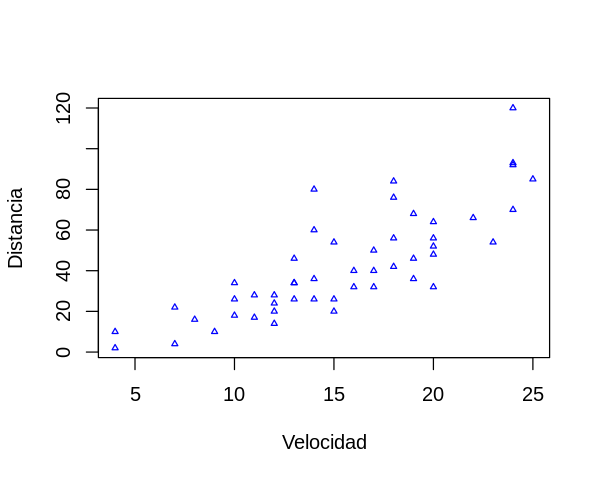

In [23]:
plot(x=cars$speed, y=cars$dist, xlab="Velocidad", ylab="Distancia", cex=0.5, pch=24, col="blue")

## Histogramas

In [24]:
head(islands)

Africa   Antarctica         Asia    Australia Axel Heiberg       Baffin 
       11506         5500        16988         2968           16          184

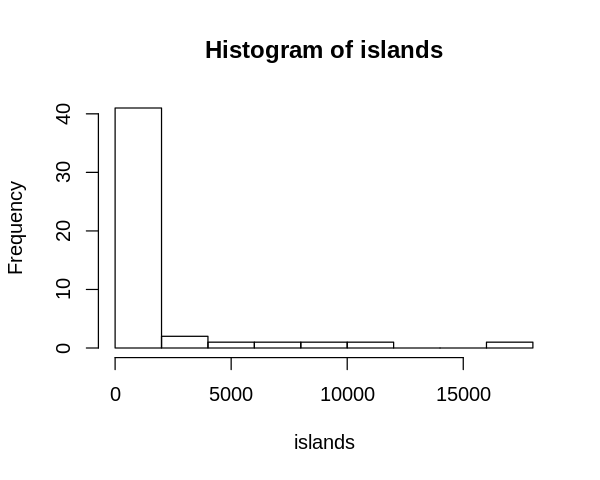

In [25]:
hist(islands)

## Barplot

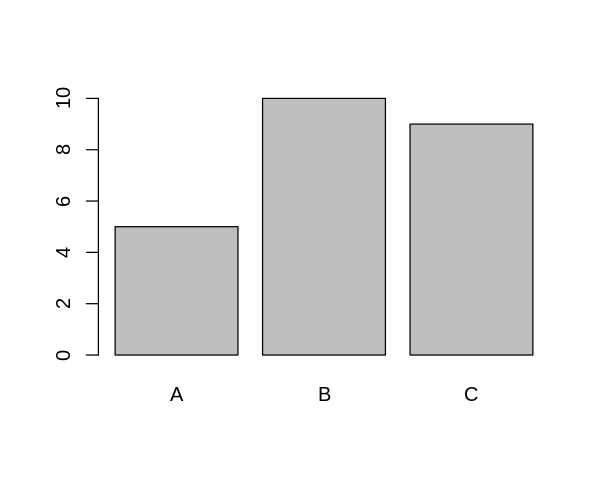

In [26]:
DNAcon<-data.frame(muestra=c("A", "B", "C"), concentracionADN=c(5,10,9))
barplot(DNAcon$concentracionADN, names.arg=DNAcon$muestra)

In [27]:
reads<-read.delim("reads.txt")
head(reads)

Library,sample,nreads
<fct>,<fct>,<int>
Lib1,pobA21_r,1381230
Lib1,pobB10,1726622
Lib1,pobB05,819766
Lib1,pobC05,442508
Lib1,pobD21_r,1398874
Lib1,Outa112_r,2024684


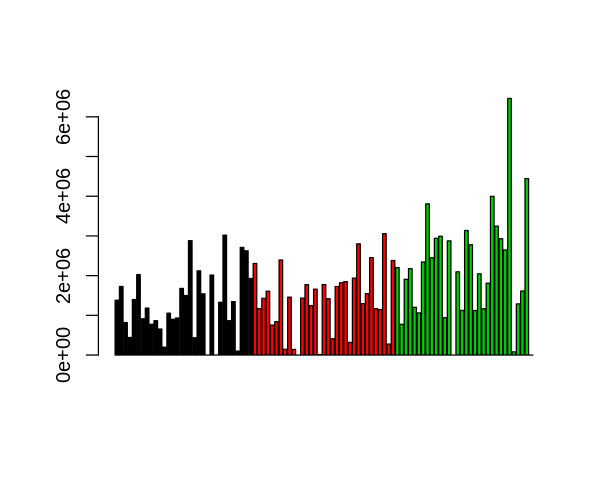

In [28]:
barplot(reads$nreads, col=reads$Library)


In [29]:
#colores
palette()

[1] "black"   "red"     "green3"  "blue"    "cyan"    "magenta" "yellow" 
[8] "gray"

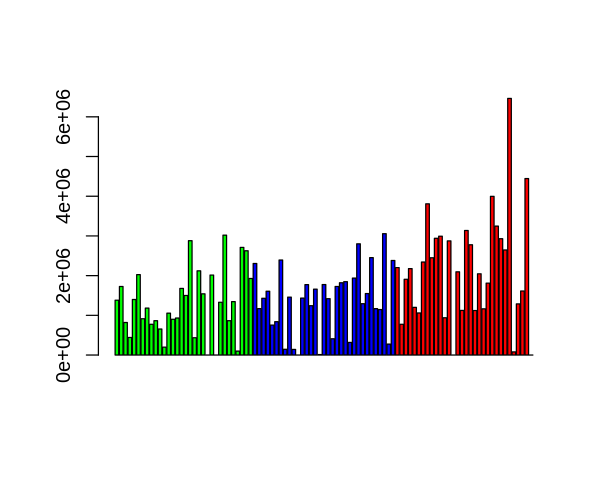

In [30]:
#cambiar
palette(c("green", "blue", "red"))

barplot(reads$nreads, col=reads$Library)

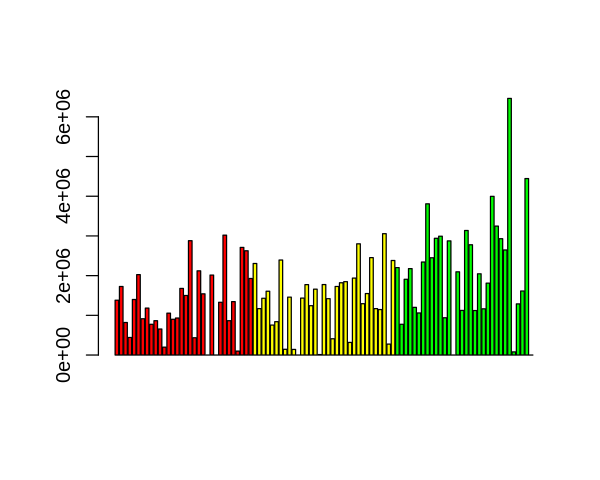

In [31]:
#paletas predeterminadas
# Cambiar palette a 6 colores del arcoiris
palette(rainbow(6))

# volver a graficar
barplot(reads$nreads, col=reads$Library)

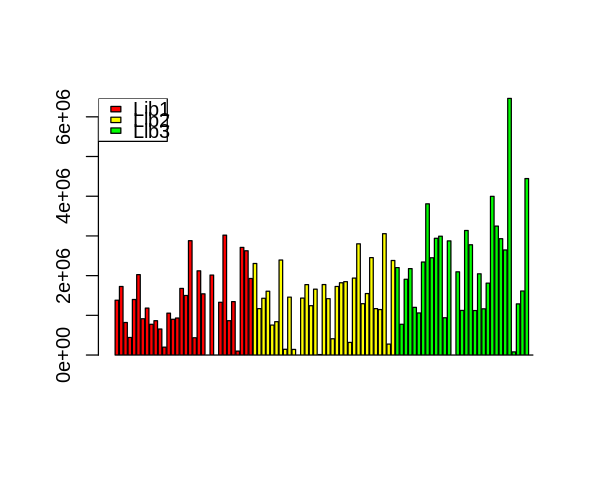

In [32]:
#agregar leyenda
# Graficar
barplot(reads$nreads, col=reads$Library)
# Agregar leyenda
legend(x="topleft", legend=levels(reads$Library), fill=palette()[1:3])

Nota que legend es una función por si misma (i.e. NO un argumento de plot) que requiere que antes de correrlo se haya corrido plot. Es decir una vez que creamos una gráfica podemos agregar sobre de esta una leyenda. Lo mismo puede hacerse con la función title.

# plot2
### Las gráficas que hemos visto hasta ahora pueden verse un poco feas de inicio y puede tomar un rato y mucho código arreglarlas a algo hermoso.  ggplot2 es un paquete que ahorra este trabajo y que ahora es ampliamente adoptado.

`ggplot2` construye gráficas “definiendo sus componentes paso a paso”. **(POR CAPAS)**

Para poder usar `ggplot2` se requiere que la data.frame esté en formato largo

* [Documentación online de ggplot2](http://docs.ggplot2.org/current/)
* [R Graphics Cookbook](http://www.cookbook-r.com/Graphs/)


### Tèrminos importantes:
**`ggplot` la función principal donde se especifican el _set de datos_ y las _variables a graficar_.**
- `geoms` “objetos geométricos” (el tipo de gráfica en cierto modo):
- `geom_point()`
- `geom_bar()`
- `geom_density()`
- `geom_line()`
- `geom_area()`
- `geom_histogram()`
- `aes` los estéticos que pondremos: forma, transparencia (alpha), color, relleno, tipo de línea, etc.
- `scales` para especificar si los datos se graficarán de forma continua, discreta, logarítmica.
- `themes` para modificar los elementos de la gráfica no relacionados con los datos, como el tipo de letra y el color del fondo.

In [33]:
library(ggplot2)

In [34]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


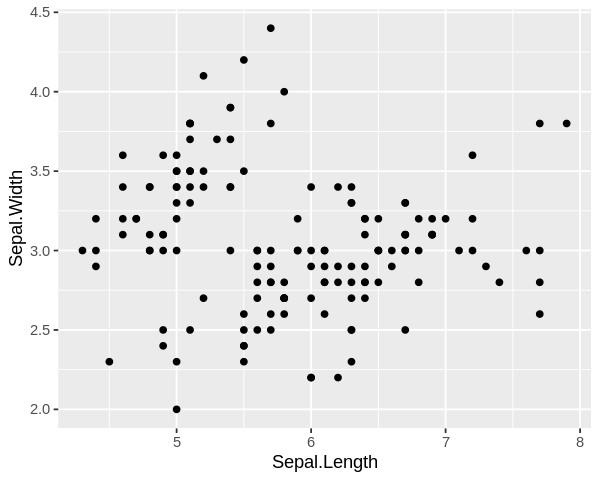

In [35]:
ggplot(data=iris, aes(x=Sepal.Length, y= Sepal.Width)) + geom_point()

se pueden sumar capas, por eso aparece el signo +

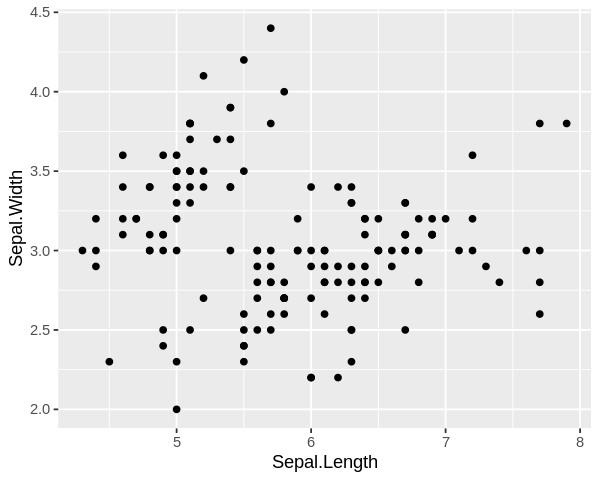

In [36]:
myplot<-ggplot(data=iris, aes(x=Sepal.Length, y= Sepal.Width))

myplot + geom_point() 

Los colores y formas se cambian en `aes`

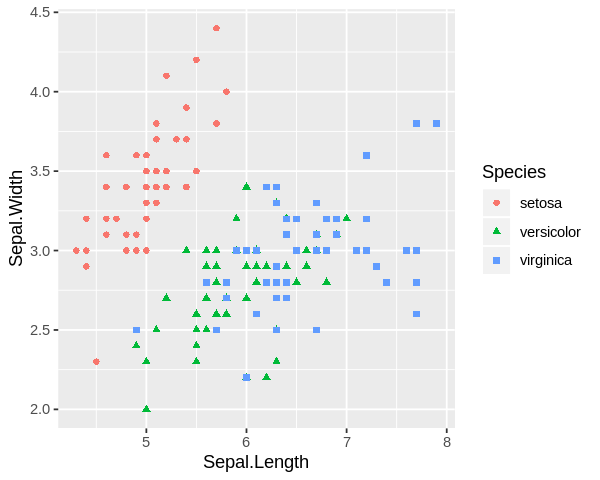

In [37]:
ggplot(data=iris, aes(x=Sepal.Length, y= Sepal.Width, color= Species, shape=Species)) + geom_point()

**Ya sea en el aes de la función inicial o dentro de los geoms (Nota que el tamaño no es un aes, sino un argumento de geom_point)**

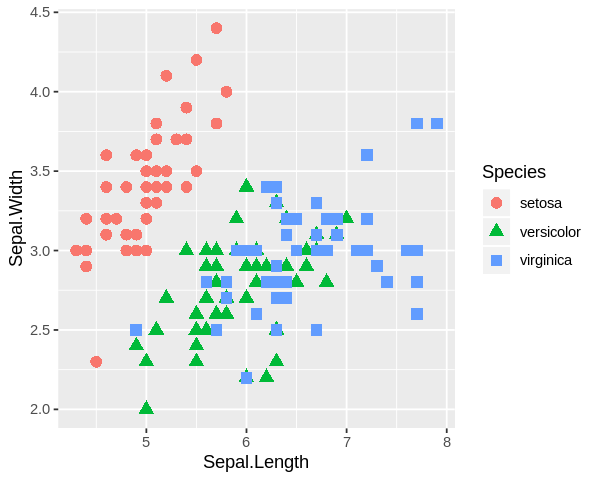

In [38]:
ggplot(data=iris, aes(x=Sepal.Length, y= Sepal.Width)) + 
    geom_point(aes(color= Species, shape=Species), size=3)

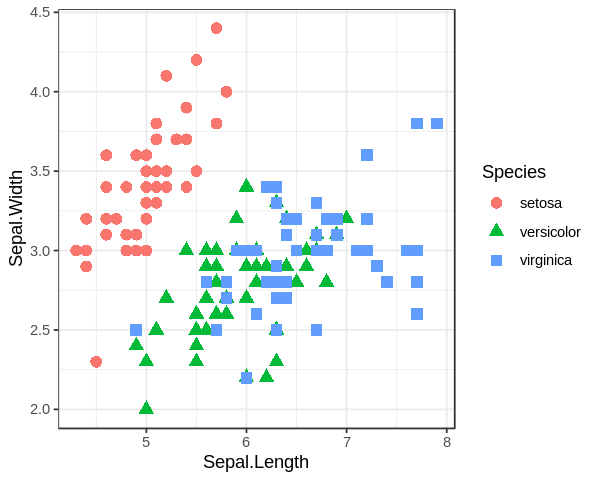

In [39]:
#quitar fondo gris
ggplot(data=iris, aes(x=Sepal.Length, y= Sepal.Width)) + 
    geom_point(aes(color= Species, shape=Species), size=3) + 
    theme_bw()

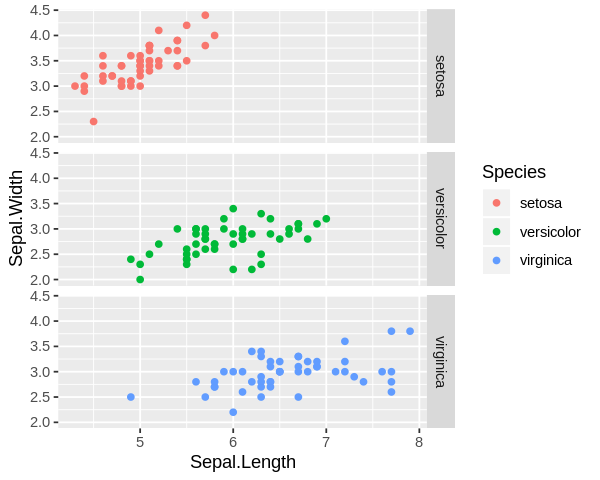

In [43]:
#graficar en páneles separados la misma info para diferentes tratamientos o especies
ggplot(data=iris, aes(x=Sepal.Length, y= Sepal.Width, color=Species)) + 
    geom_point() +
    facet_grid(Species ~ .)

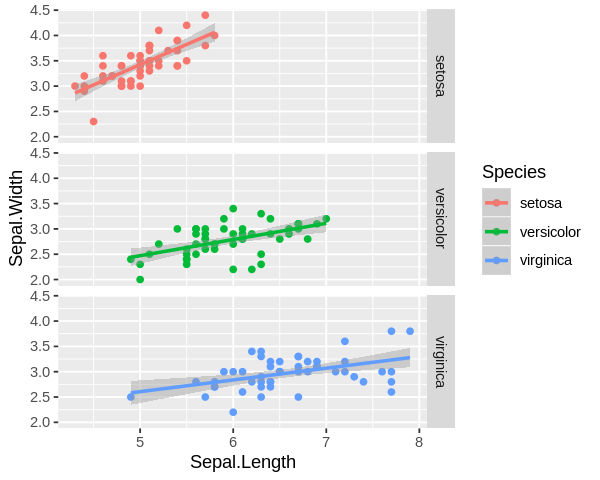

In [45]:
#agregar un modelo matematico -> regresión lineal
ggplot(data=iris, aes(x=Sepal.Length, y= Sepal.Width, color=Species)) + 
  geom_point() +
  facet_grid(Species ~ .) +
  geom_smooth(method="lm")

# Barplot
En este tipo de gráficas la altura de las barras puede significar dos cosas:

* la cuenta (frecuencia) de casos de cada valor de x. Si quieres graficar esto utiliza stat="bin" en los argumentos de geom_bar.
* el valor de la columna en el set de datos. Si quieres graficar esto utiliza stat="identity" en los argumentos de geom_bar.

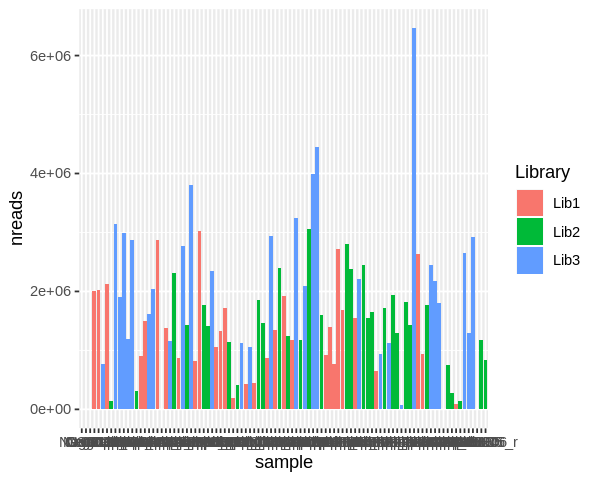

In [47]:
p <- ggplot(data=reads, aes(x=sample, y=nreads, fill=Library)) + 
  geom_bar(stat="identity") 
p 

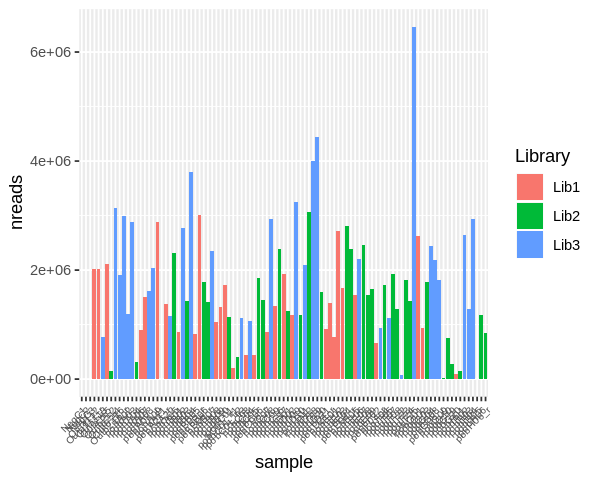

In [48]:
# Rotar nombres muestras
p <- p +  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=6))
p

In [49]:
head(levels(reads$sample))


[1] "NegC1"     "NegC2"     "NegC3"     "Outa112"   "Outa112_r" "Outa113"

In [50]:
# Cambiar orden de levels:
reads$sample<-factor(reads$sample, levels = reads$sample[order(1:length(reads$sample))])
head(levels(reads$sample))

[1] "pobA21_r"  "pobB10"    "pobB05"    "pobC05"    "pobD21_r"  "Outa112_r"

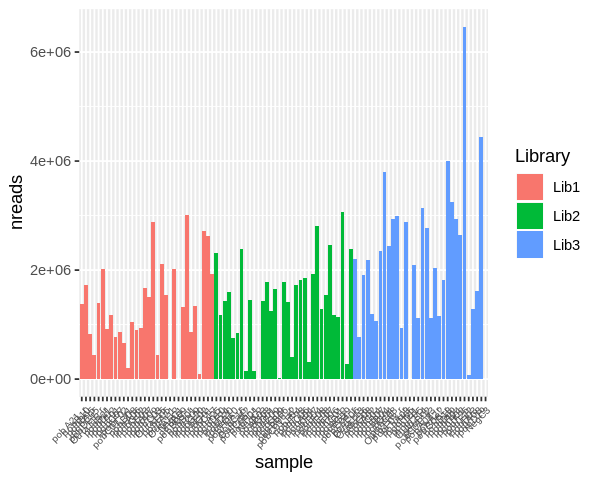

In [51]:
# Graficar
# plot
p <- ggplot(data=reads, aes(x=sample, y=nreads, fill=Library)) + geom_bar(stat="identity") 
p +  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=6))

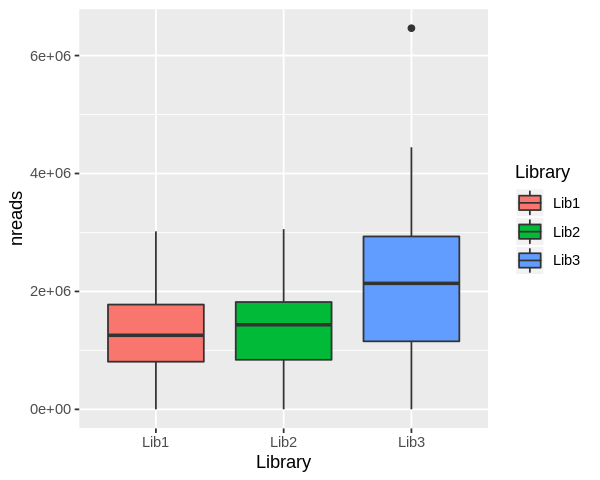

In [52]:
# plot
p <- ggplot(data=reads, aes(x=Library, y=nreads, fill=Library)) + geom_boxplot()
p

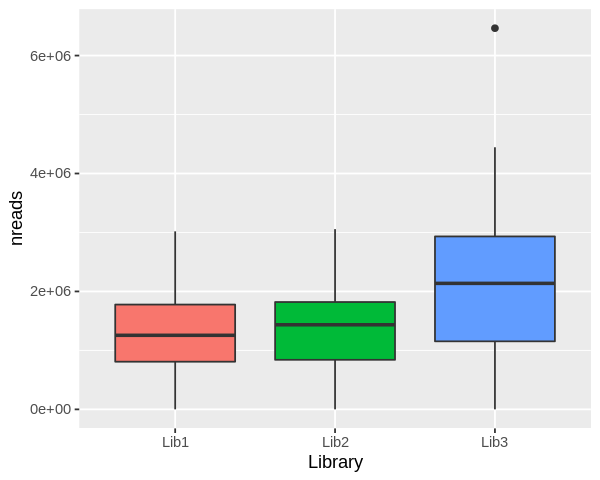

In [53]:
# quitar leyenda
p + guides(fill=FALSE)

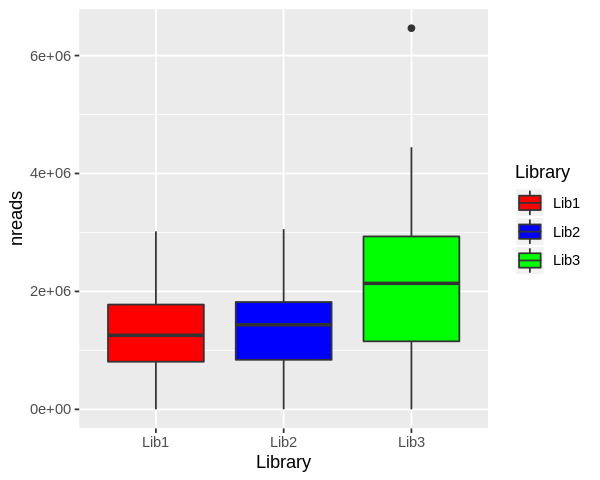

In [54]:
# Crear paleta:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

# Usar paleta en gráfica:
p <- ggplot(data=reads, aes(x=Library, y=nreads, fill=Library)) + geom_boxplot()
p + scale_fill_manual(values=c("red", "blue", "green"))

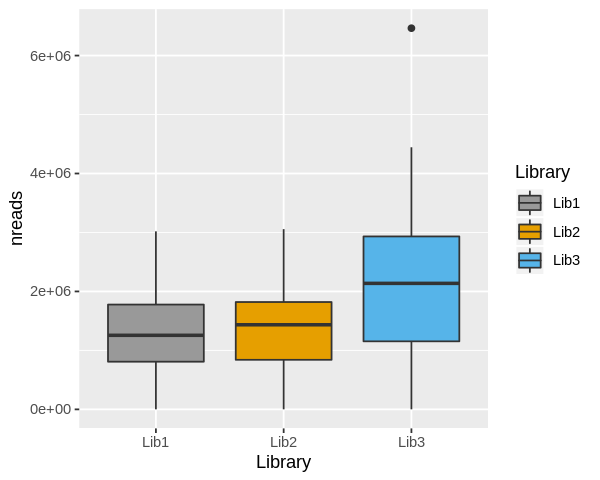

In [55]:
# Crear paleta apta para daltónicos:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

# Usar paleta en gráfica:
p <- ggplot(data=reads, aes(x=Library, y=nreads, fill=Library)) + geom_boxplot()
p + scale_fill_manual(values=cbPalette)

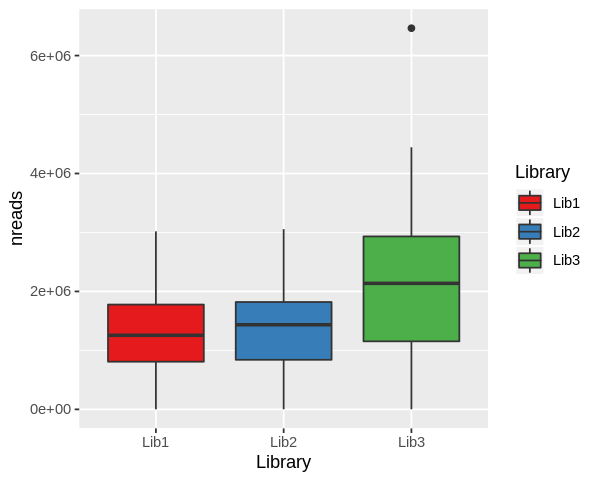

In [56]:
#usar la paleta de ColorBrewer
p <- ggplot(data=reads, aes(x=Library, y=nreads, fill=Library)) + geom_boxplot()
p + scale_fill_brewer(palette="Set1")

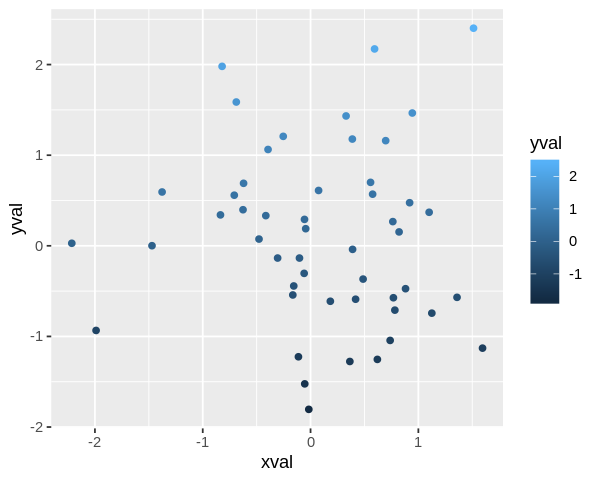

In [57]:
# Generar datos
set.seed(1)
df <- data.frame(xval=rnorm(50), yval=rnorm(50))

# Plot
ggplot(df, aes(x=xval, y=yval, colour=yval)) + geom_point()

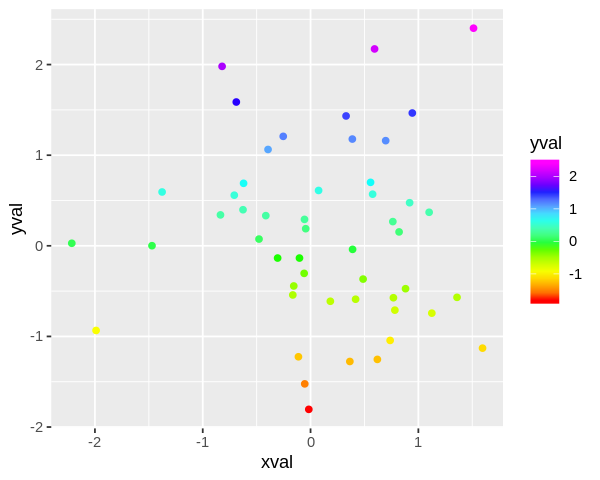

In [58]:
# Cambiar gradiente
ggplot(df, aes(x=xval, y=yval, colour=yval)) + geom_point() + 
    scale_colour_gradientn(colours=rainbow(6))

## Múltiples gráficas (=/= facets) en una gráfica:
Veamos este ejemplo de R Cookbook sobre mutlipltos:

Primero generamos y guardamos en objetos 4 gráficas:

In [59]:
# This example uses the ChickWeight dataset, which comes with ggplot2
# First plot
p1 <- ggplot(ChickWeight, aes(x=Time, y=weight, colour=Diet, group=Chick)) +
    geom_line() +
    ggtitle("Growth curve for individual chicks")

# Second plot
p2 <- ggplot(ChickWeight, aes(x=Time, y=weight, colour=Diet)) +
    geom_point(alpha=.3) +
    geom_smooth(alpha=.2, size=1) +
    ggtitle("Fitted growth curve per diet")

# Third plot
p3 <- ggplot(subset(ChickWeight, Time==21), aes(x=weight, colour=Diet)) +
    geom_density() +
    ggtitle("Final weight, by diet")

# Fourth plot
p4 <- ggplot(subset(ChickWeight, Time==21), aes(x=weight, fill=Diet)) +
    geom_histogram(colour="black", binwidth=50) +
    facet_grid(Diet ~ .) +
    ggtitle("Final weight, by diet") +
    theme(legend.position="none")        # No legend (redundant in this graph)    

In [60]:
library(Rmisc)

ERROR: Error in library(Rmisc): there is no package called ‘Rmisc’


In [69]:
library(Rmisc)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


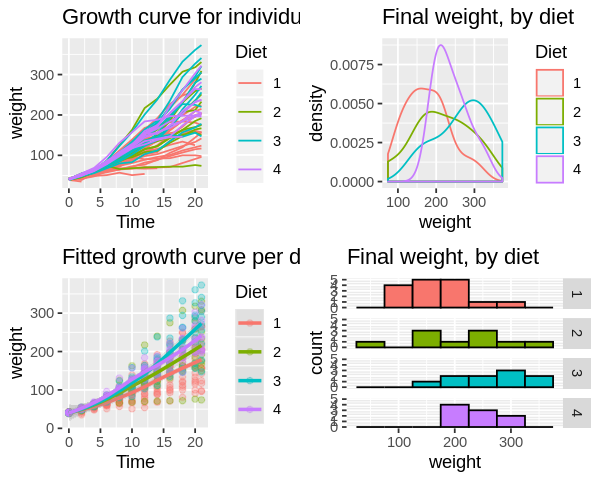

In [70]:
multiplot(p1, p2, p3, p4, cols=2)

## Mapas en R

In [75]:
library(maptools)

In [83]:
biogeo<-rgdal::readOGR("../../../BioinfinvRepro/Unidad3/PracUni3/maices/data/rbiog4mgw/rbiog4mgw.shp")

ERROR: Error in loadNamespace(name): there is no package called ‘rgdal’
